In [7]:
# N-dim arrays
# four classes are available: dense/sparse + mutable/immutable
from sympy import *
#from sympy import Array
init_printing(use_unicode=True)

In [8]:
A = Array([[1,2],[3,4]])

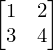

In [9]:
A

In [27]:
B = Array(range(12), (3,4))

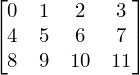

In [28]:
B

In [29]:
C = Array(range(12), (2,2,3))

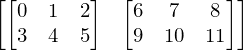

In [30]:
C

In [31]:
# rank of the Array
A.rank()

In [32]:
B.rank()

In [33]:
C.rank()

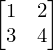

In [34]:
A.tomatrix()

In [35]:
A.tolist()

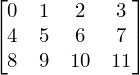

In [36]:
B.tomatrix()

In [39]:
C.tolist()

In [40]:
# no default functionality for converting higher-order tensors into matrices
C.tomatrix()

ValueError: Dimensions must be of size of 2

In [42]:
# tensor products: higher-order tensors from lower-order tensors

# unit vectors
##############

i = Array([1,0,0])
j = Array([0,1,0])
k = Array([0,0,1])

In [43]:
ii = tensorproduct(i,i)

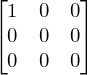

In [44]:
ii

In [45]:
ij = tensorproduct(i,j)

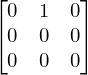

In [46]:
ij


In [47]:
# similarly
# ii, ij, ik
# ji, jj, jk
# ki, kj, kk


In [48]:
i.rank()

In [49]:
ii.rank()

In [50]:
I2 = Array([[1,0,0], [0,1,0], [0,0,1]])

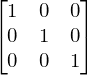

In [51]:
I2

In [52]:
# fourth-order tensor
# I4_1_ijkl = delta_ij delta_kl
I4_1 = tensorproduct(I2, I2)

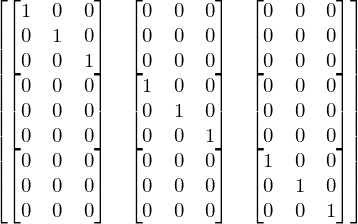

In [53]:
I4_1

In [54]:
Matrix(I4_1)

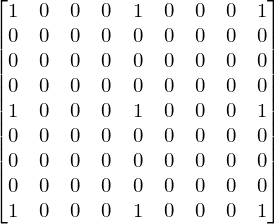

In [56]:
Matrix(I4_1).reshape(9,9)

In [60]:
# I4_2_ijkl = delta_ik delta_jl
I4_2 = eye(9)

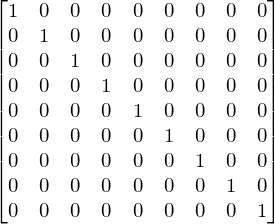

In [61]:
I4_2

In [63]:
# tensor contraction
A = Array([[1,2,3],[4,5,6],[7,8,9]])

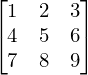

In [64]:
A

In [73]:
# the matrix trace is equivalent to contaction of second-order tensor along axes 1 and 2
# since the starting index in Python is zero.
trA = tensorcontraction(A, (0,1))

In [74]:
trA

In [77]:
# matrix product is the contaction of fourth order tensor along axes 2 and 3
# of the fourth-order tensor formed as the tensor product of the matrices as rank-2 tensor
D = Array([[1,2],[3,4]])

In [79]:
DtD = tensorproduct(D,D)

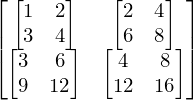

In [80]:
DtD

In [81]:
DtD.rank()

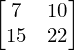

In [85]:
tensorcontraction(DtD,(1,2))

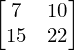

In [84]:
D.tomatrix()*D.tomatrix()

In [86]:
#

In [87]:
#

In [101]:
# indexed objects
# A[i,j]
# A is the IndexedBase
# i and j are indices

A = IndexedBase('A')
i,j = symbols('i j', cls=Idx)

In [102]:
A[i,j]

In [103]:
A[i,j].shape

IndexException: 
Shape cannot be inferred from Idx with undefined range: A[i, j]

In [104]:
i = Idx('i', 3)
j = Idx('j', 3)

In [105]:
A[i,j].shape

In [106]:
A[i,j].ranges

In [107]:
i.lower

In [108]:
i.upper

In [109]:
# index with unbounded upper limit
k = Idx('k', oo)

In [110]:
k.lower

In [111]:
k.upper

In [112]:
#

In [113]:
#

In [114]:
# Matrix expressions
from sympy import MatrixSymbol, Matrix

In [115]:
F = MatrixSymbol('F',3,3)

In [116]:
F.shape

In [117]:
F

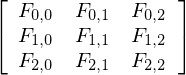

In [118]:
Matrix(F)

In [124]:
A = MatrixSymbol('A',3,3)
B = MatrixSymbol('B',3,3)
C = MatrixSymbol('C',3,3)

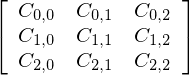

In [125]:
Matrix(C)

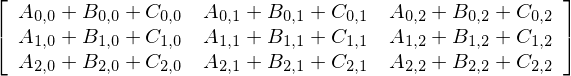

In [127]:
# MatrixAddition
Matrix(MatAdd(A,B,C))

In [128]:
MatMul(A,B,C)

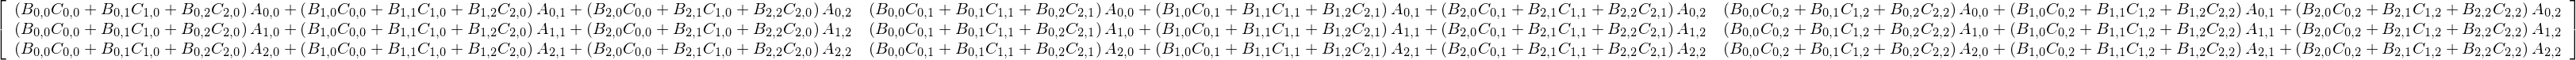

In [129]:
Matrix(MatMul(A,B,C))

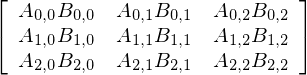

In [130]:
Matrix(hadamard_product(A,B))

In [131]:
# matrix inverse
Ainv = Inverse(A)

In [132]:
Ainv

In [134]:
IA = Trace(A)

In [135]:
IA

In [136]:
# tensor calculs

i = Idx('i', 3)
j = Idx('j', 3)
k = Idx('k', 3)
l = Idx('l', 3)


In [137]:
A=MatrixSymbol('A',3,3)

In [138]:
A

In [140]:
print(diff(F[i,j],F[i,j]))

1


In [143]:
print(diff(F[k,l],F[i,j]))

KroneckerDelta(i, k)*KroneckerDelta(j, l)


In [145]:
from sympy.concrete.delta import _simplify_delta

_simplify_delta(diff(F[k,l],F[i,j]))

In [147]:
C = F.T*F

In [163]:
print(diff(C[i,j],F[k,l]))
_simplify_delta(diff(C[i,j],F[k,l]))

KroneckerDelta(0, k)*KroneckerDelta(i, l)*F[0, j] + KroneckerDelta(0, k)*KroneckerDelta(j, l)*F[0, i] + KroneckerDelta(1, k)*KroneckerDelta(i, l)*F[1, j] + KroneckerDelta(1, k)*KroneckerDelta(j, l)*F[1, i] + KroneckerDelta(2, k)*KroneckerDelta(i, l)*F[2, j] + KroneckerDelta(2, k)*KroneckerDelta(j, l)*F[2, i]


In [164]:
simplify(diff(C[i,j],F[k,l]))

In [152]:
Determinant(A)

In [154]:
LeviCivita(i,j,k)

In [156]:
Finv=Inverse(F)

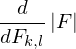

In [159]:
diff(Determinant(F),F[k,l])